## Backtest estatrégias

retornos     -0.271386
estrategia    0.383856
dtype: float64
retornos     -0.237678
estrategia    0.467934
dtype: float64


True

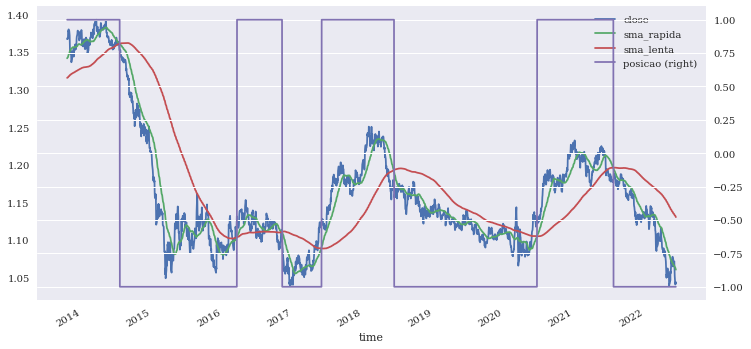

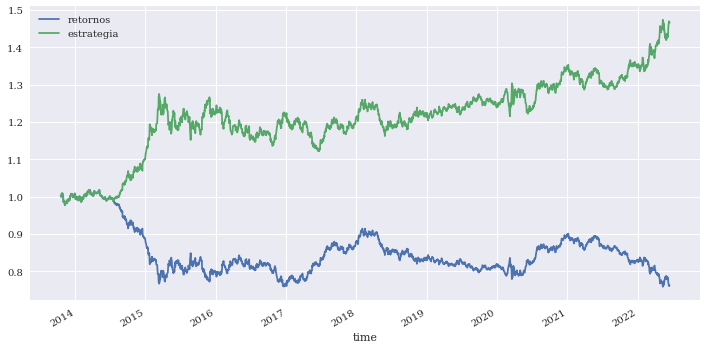

In [10]:
# code 009 - backtest estrategia cruzamento médias 43/252

# inportação bibliotecas necessarias
from datetime import datetime
import MetaTrader5 as mt5
from pylab import mpl, plt
import pandas as pd
import numpy as np

# configuração parametros do grafico
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

# configuração parametros do pandas
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1500)
pd.set_option('mode.chained_assignment', None)

# inicialização da plataforma
mt5.initialize()

# seleção do ativo
ativo = 'EURUSD'
simbolos = mt5.symbol_select(ativo, True)

time_frame = mt5.copy_rates_from(ativo, mt5.TIMEFRAME_D1, datetime.today(), 2_500)
#print(time_frame)

# trasnformação em dataframe
data = pd.DataFrame(time_frame)
# configuração do time
data['time'] = pd.to_datetime(data['time'], unit='s')

# criação dos indicadores
# medias 43(rapida) / 252(lenta)
data['sma_rapida'] = data['close'].rolling(43).mean()
data['sma_lenta'] = data['close'].rolling(252).mean()

# limpeza dos dados Nan
data.dropna(inplace=True)

# seleção de variaveis para backtest
data = data[['close', 'time', 'sma_rapida', 'sma_lenta']]

# time para indice(transformação em serie temporal)
data = data.set_index('time')

'''
# plot do grafico com as médias
data.plot(figsize=(12, 6))
plt.show()

'''

# configurações da estrategia
# estratégia onde sma_rapida acima= 1, sma_lenta acima=-1
data['posicao'] = np.where(data['sma_rapida'] > data['sma_lenta'], 1, -1)

data['posicao'] = data['posicao'].shift(1)
data.dropna(inplace=True)

# plot do grafico com as posições
data.plot(figsize=(12,6), secondary_y='posicao')
#plt.show()

# configuração do backtest

# calculo retornos
data['retornos'] = np.log(data['close']/data['close'].shift(1))
data.dropna(inplace=True)

# calculo retornos estrategia
data['estrategia'] = data['posicao'] * data['retornos']

# retorno simples estratégia
retorno_simples = data[['retornos', 'estrategia']].sum()
print(retorno_simples)

# retorno log estratégia
retorno_log = data[['retornos', 'estrategia']].sum().apply(np.exp) - 1
print(retorno_log)

# print retornos estratégia
data[['retornos', 'estrategia']].cumsum().apply(np.exp).plot(figsize=(12,6))

# encerrando conexão
mt5.shutdown()

retornos     -0.268751
estrategia    0.381221
dtype: float64
retornos     -0.235666
estrategia    0.464071
dtype: float64


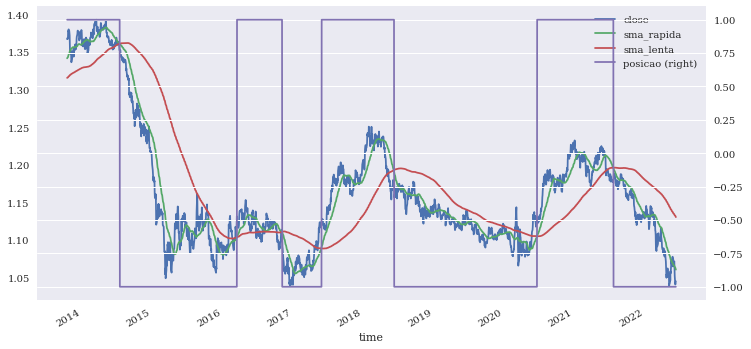

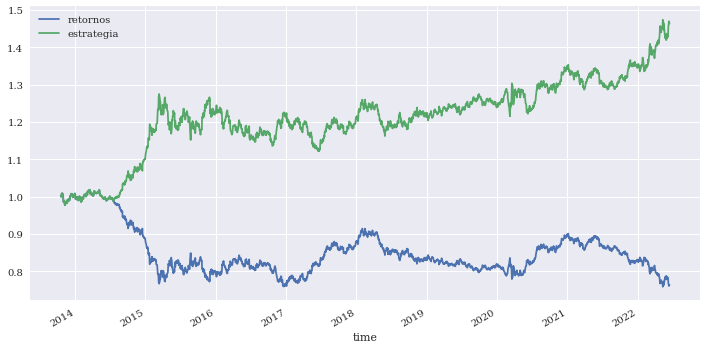

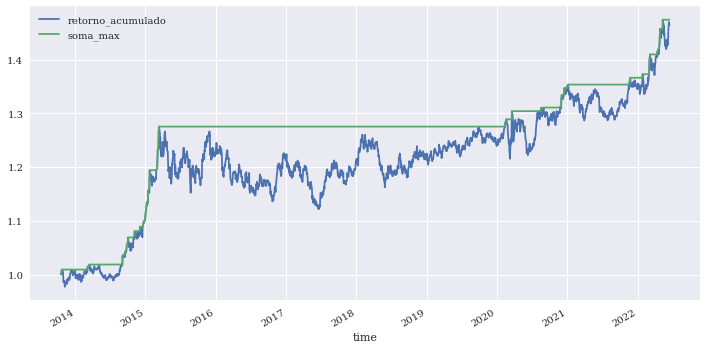

Rebaixamento: 0.15% 
1797 days, 0:00:00


True

In [26]:
# code 010 - backtest estrategia cruzamento médias 43/252 rebaixamento

# inportação bibliotecas necessarias
from datetime import datetime
import MetaTrader5 as mt5
from pylab import mpl, plt
import pandas as pd
import numpy as np

# configuração parametros do grafico
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

# configuração parametros do pandas
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1500)
pd.set_option('mode.chained_assignment', None)

# inicialização da plataforma
mt5.initialize()

# seleção do ativo
ativo = 'EURUSD'
simbolos = mt5.symbol_select(ativo, True)

time_frame = mt5.copy_rates_from(ativo, mt5.TIMEFRAME_D1, datetime.today(), 2_500)
#print(time_frame)

# trasnformação em dataframe
data = pd.DataFrame(time_frame)
# configuração do time
data['time'] = pd.to_datetime(data['time'], unit='s')

# criação dos indicadores
# medias 43(rapida) / 252(lenta)
data['sma_rapida'] = data['close'].rolling(43).mean()
data['sma_lenta'] = data['close'].rolling(252).mean()

# limpeza dos dados Nan
data.dropna(inplace=True)

# seleção de variaveis para backtest
data = data[['close', 'time', 'sma_rapida', 'sma_lenta']]

# time para indice(transformação em serie temporal)
data = data.set_index('time')

'''
# plot do grafico com as médias
data.plot(figsize=(12, 6))
plt.show()

'''

# configurações da estrategia
# estratégia onde sma_rapida acima= 1, sma_lenta acima=-1
data['posicao'] = np.where(data['sma_rapida'] > data['sma_lenta'], 1, -1)

data['posicao'] = data['posicao'].shift(1)
data.dropna(inplace=True)

# plot do grafico com as posições
data.plot(figsize=(12,6), secondary_y='posicao')
#plt.show()

# configuração do backtest

# calculo retornos
data['retornos'] = np.log(data['close']/data['close'].shift(1))
data.dropna(inplace=True)

# calculo retornos estrategia
data['estrategia'] = data['posicao'] * data['retornos']

# retorno simples estratégia
retorno_simples = data[['retornos', 'estrategia']].sum()
print(retorno_simples)

# retorno log estratégia
retorno_log = data[['retornos', 'estrategia']].sum().apply(np.exp) - 1
print(retorno_log)

# print retornos estratégia
data[['retornos', 'estrategia']].cumsum().apply(np.exp).plot(figsize=(12,6))

# retorno acumulado
data['retorno_acumulado'] = data['estrategia'].cumsum().apply(np.exp)
data['soma_max'] = data['retorno_acumulado'].cummax()


# plot dos retornos acumulados
data[['retorno_acumulado', 'soma_max']].dropna().plot(figsize=(12,6))
plt.show()

# variavel rebaixamento
rebaixamento = (data['soma_max'] - data['retorno_acumulado']).max()
drawdown = data['soma_max'] - data['retorno_acumulado']
print(f'Rebaixamento: {rebaixamento:.2f}% ')

# tempo de rebaixamento
temp = drawdown[drawdown == 0]
periodos_rebaixamento = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())

# periodo maximo de rebaixamento
print(periodos_rebaixamento.max())

# encerrando conexão
mt5.shutdown()

In [56]:
# code 010 - backtest estrategia compra queda vende alta

# inportação bibliotecas necessarias
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

# baixando dados pelo yfinance
ativo_df = yf.download('PETR4.SA', start='2020-02-02', end=datetime.datetime.today())

# dataframe com indices dos dados baixados
data_signal = pd.DataFrame(index = ativo_df.index)

# preços baixados 
data_signal['price'] = ativo_df['Adj Close']

# retornos diarios
data_signal['diff_diaria'] = data_signal['price'].diff()

# estrategia
data_signal['signal'] = 0.0
data_signal['signal'] = np.where(data_signal['diff_diaria'] > 0, 1.0, 0.0)

# não repetir orden 
data_signal['position'] = data_signal['signal'].diff

# parametros do backtest
capital_inicial = 1_000.00

# posições dataframe
positions = pd.DataFrame(index= data_signal.index).fillna(0.0)

# postifolio dataframe
portifolio = pd.DataFrame(index= data_signal.index).fillna(0.0)

# adc ativo a dataframe de posições
positions['PETR4'] = data_signal['signal']

# aplicando estrategia
portifolio['positions'] = (positions.multiply(data_signal['price'], axis = 0 )).cumsum()
portifolio['cash'] = capital_inicial - (positions.diff().multiply(data_signal['price'], axis = 0))
portifolio['total'] = portifolio['positions'] + portifolio['cash']

# resultado estratégia
print(portifolio[-1:])

[*********************100%***********************]  1 of 1 completed
              positions     cash        total
Date                                         
2022-06-15  5811.375633  1029.08  6840.455633
